In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.shape

(150, 5)

In [4]:
#!pip install sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.drop('target', axis=1).values
label = df['target'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=40)

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [9]:
y_train = torch.LongTensor(y_train).reshape(-1, 1)
y_test = torch.LongTensor(y_test).reshape(-1, 1)

In [10]:
# the same thing in Pytorch

from torch.utils.data import TensorDataset, DataLoader

In [11]:
data = df.drop('target', axis='columns').values
labels = df['target'].values

In [12]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [13]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [14]:
iris_loader = DataLoader(iris, batch_size=30, shuffle=True)

In [15]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[5.2000, 3.5000, 1.5000, 0.2000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.5000, 2.4000, 3.7000

In [16]:
# basic ANN in Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [18]:
torch.manual_seed(32)
model = Model()

In [19]:
X = df.drop('target', axis='columns')
y = df.target

In [20]:
X = X.values
y = y.values

In [21]:
X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=.2, random_state=33)

In [22]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [23]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [25]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [26]:
num_epochs = 1000
losses = list()

for i in range(num_epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    if (i+1)%10 == 0:
        print(f'Epoch {i+1}, and loss is {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch 10, and loss is 1.119666337966919
Epoch 20, and loss is 1.0878665447235107
Epoch 30, and loss is 1.0632193088531494
Epoch 40, and loss is 1.0388150215148926
Epoch 50, and loss is 1.0132087469100952
Epoch 60, and loss is 0.9884135127067566
Epoch 70, and loss is 0.9638591408729553
Epoch 80, and loss is 0.9414136409759521
Epoch 90, and loss is 0.9191409945487976
Epoch 100, and loss is 0.8962752223014832
Epoch 110, and loss is 0.8732836842536926
Epoch 120, and loss is 0.8505951166152954
Epoch 130, and loss is 0.8287228941917419
Epoch 140, and loss is 0.8079700469970703
Epoch 150, and loss is 0.7884194254875183
Epoch 160, and loss is 0.7700219750404358
Epoch 170, and loss is 0.7530107498168945
Epoch 180, and loss is 0.7372433543205261
Epoch 190, and loss is 0.7221634984016418
Epoch 200, and loss is 0.7078309655189514
Epoch 210, and loss is 0.6940539479255676
Epoch 220, and loss is 0.6808221340179443
Epoch 230, and loss is 0.6682024002075195
Epoch 240, and loss is 0.6558867692947388
Ep

Text(0.5, 0, 'epoch')

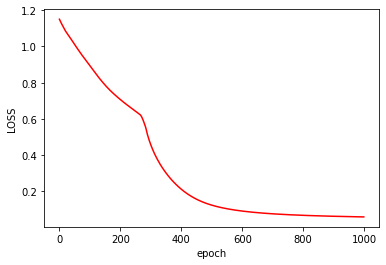

In [27]:
plt.plot(range(num_epochs), losses, 'r')
plt.ylabel('LOSS')
plt.xlabel('epoch')

In [28]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [29]:
loss

tensor(0.0560)

In [32]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1} {str(y_val)} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} predictions.')

1 tensor([-1.5982,  5.4332, -0.4496]) 1
2 tensor([-1.4483,  6.1249, -0.9493]) 1
3 tensor([ 5.0139, -0.6548, -7.4435]) 0
4 tensor([-3.1349,  5.2119,  1.2768]) 1
5 tensor([-6.2794,  2.6860,  5.5604]) 2
6 tensor([-8.8792,  0.4192,  8.9435]) 2
7 tensor([ 4.9307, -0.5031, -7.4138]) 0
8 tensor([ 5.6056, -0.9594, -8.1330]) 0
9 tensor([-6.0586,  2.7504,  5.2582]) 2
10 tensor([-7.8943,  1.7156,  7.5663]) 2
11 tensor([-8.4952,  1.1762,  8.3993]) 2
12 tensor([ 4.9999, -0.7994, -7.2969]) 0
13 tensor([-7.8573,  1.1393,  7.7133]) 2
14 tensor([-3.0650,  4.8259,  1.3399]) 1
15 tensor([-6.4999,  2.7525,  5.7090]) 2
16 tensor([-1.4817,  6.0019, -0.8403]) 1
17 tensor([-4.6743,  3.3464,  3.5708]) 2
18 tensor([ 5.6900, -0.9530, -8.2740]) 0
19 tensor([-2.6818,  5.0352,  0.8254]) 1
20 tensor([-6.6109,  3.1789,  5.6876]) 2
21 tensor([ 5.2394, -0.7339, -7.7379]) 0
22 tensor([ 5.8545, -0.8644, -8.6145]) 0
23 tensor([-8.3505,  1.0427,  8.2709]) 2
24 tensor([ 5.1925, -0.7519, -7.6472]) 0
25 tensor([-6.0829,  2.86

In [33]:
# saving the model
# only weights and biases
# all model -> torch.save(model, 'path.pt')
torch.save(model.state_dict(), 'my_iris_model.pt')

In [34]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [35]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)